In [1]:
from PIL import Image 
import numpy as np 
import cv2
import matplotlib.pyplot as plt 
import os 
import sys

In [2]:
cmap = {
        0: (0, 0, 0),           # background
        1: (255, 0, 0),         # aeroplane
        2: (192, 192, 128),     # bicycle
        3: (128, 64, 128),      # bird
        4: (0, 0, 255),         # boat
        5: (0, 255, 0),         # bottle
        6: (192, 128, 128),     # bus
        7: (64, 64, 128),       # car
        8: (64, 0, 128),        # cat
        9: (64, 64, 0),         # chair
        10: (0, 128, 192),      # cow
        11: (0, 255, 255),      # diningtable
        12: (255, 0, 255),      # dog
        13: (255, 128, 0),      # horse
        14: (0, 102, 102),      # motorbike
        15: (102, 0, 204),      # person
        16: (128, 255, 0),      # potted_plant
        17: (224, 224, 224),    # sheep
        18: (102, 0, 51),       # sofa
        19: (153, 76, 0),       # train
        20: (229, 244, 204),    # tv_monitor
        255: (255, 255, 255)    # void
    }

In [3]:
#SegPath = r"E:\ProgrammingSkills\python\DEEP_LEARNING\DATASETS\PASCALVOC\VOCdevkit\VOC2012\SegmentationClass"
SegPath = r"D:\Code\Dataset\PASCAL-VOOC\VOCtrainval_11-May-2012\VOCdevkit\VOC2012\SegmentationClass"
SegItems = [os.path.join(SegPath, each) for each in os.listdir(SegPath)]

In [5]:

#im = cv2.imread(SegItems[it])
#im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
#im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
#im[im == np.max(im)] = 0


In [6]:
im = Image.open(SegItems[it]).convert('RGB')
nim = np.array(im)
nim.shape

(375, 500, 3)

In [7]:
c1 = nim[:,:,0]
c2 = nim[:,:,1]
c3 = nim[:,:,2]

In [8]:
print(np.unique(c1))
print(np.unique(c2))
print(np.unique(c3))


[  0  64 192 224]
[  0 128 224]
[  0 128 192]


In [9]:
def color_map(N=256, normalized=False):
    def bitget(byteval, idx):
        return ((byteval & (1 << idx)) != 0)

    dtype = 'float32' if normalized else 'uint8'
    cmap = np.zeros((N, 3), dtype=dtype)
    for i in range(N):
        r = g = b = 0
        c = i
        for j in range(8):
            r = r | (bitget(c, 0) << 7-j)
            g = g | (bitget(c, 1) << 7-j)
            b = b | (bitget(c, 2) << 7-j)
            #print(r,g,b, c)
            c = c >> 3
        #print(f'end {i} {np.array([r, g, b])}')
        cmap[i] = np.array([r, g, b])

    cmap = cmap/255 if normalized else cmap
    return cmap
def color_map_viz():
    labels = ['background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor', 'void']
    nclasses = 21
    row_size = 50
    col_size = 500
    cmap = color_map()
    array = np.empty((row_size*(nclasses+1), col_size, cmap.shape[1]), dtype=cmap.dtype)
    for i in range(nclasses):
        array[i*row_size:i*row_size+row_size, :] = cmap[i]
    array[nclasses*row_size:nclasses*row_size+row_size, :] = cmap[-1]
    print(array)
    plt.imshow(array)
    plt.yticks([row_size*i+row_size/2 for i in range(nclasses+1)], labels)
    plt.xticks([])
    plt.show()
x = color_map()
x[21]

array([128,  64, 128], dtype=uint8)

In [10]:
x[15]

array([192, 128, 128], dtype=uint8)

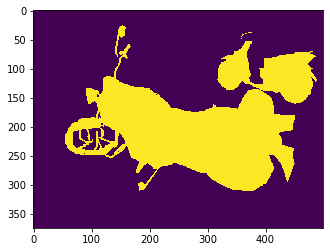

In [11]:
tmp = np.all(nim == x[13], axis=-1)
tmp1 = np.all(nim == x[14], axis=-1)
tmp2 = np.all(nim == x[15], axis=-1)
plt.imshow(tmp1)

In [83]:
vs = np.stack([tmp, tmp2])
vl = [tmp, tmp1, tmp2]
np.array(vl).shape

(3, 375, 500)

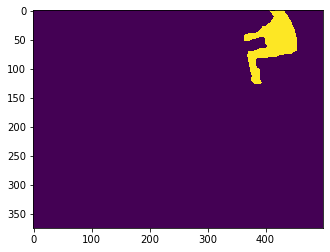

In [78]:
plt.imshow(vs[1])

In [12]:
VOC_COLORMAP = [[0, 0, 0], [128, 0, 0], [0, 128, 0], [128, 128, 0],
                [0, 0, 128], [128, 0, 128], [0, 128, 128], [128, 128, 128],
                [64, 0, 0], [192, 0, 0], [64, 128, 0], [192, 128, 0],
                [64, 0, 128], [192, 0, 128], [64, 128, 128], [192, 128, 128],
                [0, 64, 0], [128, 64, 0], [0, 192, 0], [128, 192, 0],
                [0, 64, 128]]

#@save
VOC_CLASSES = ['background', 'aeroplane', 'bicycle', 'bird', 'boat',
               'bottle', 'bus', 'car', 'cat', 'chair', 'cow',
               'diningtable', 'dog', 'horse', 'motorbike', 'person',
               'potted plant', 'sheep', 'sofa', 'train', 'tv/monitor']

In [13]:
def build_colormap2label():
    """Build an RGB color to label mapping for segmentation."""
    colormap2label = np.zeros(256 ** 3)
    for i, colormap in enumerate(VOC_COLORMAP):
        colormap2label[(colormap[0]*256 + colormap[1])*256 + colormap[2]] = i
    return colormap2label

#@save
def voc_label_indices(colormap, colormap2label):
    """Map an RGB color to a label."""
    colormap = colormap.astype(np.int32)
    idx = ((colormap[:, :, 0] * 256 + colormap[:, :, 1]) * 256
           + colormap[:, :, 2])
    return colormap2label[idx]

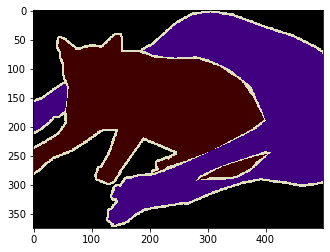

In [14]:
it = 112
im = Image.open(SegItems[it]).convert('RGB')
nim = np.array(im)
plt.imshow(nim)

In [15]:
y = voc_label_indices(nim, build_colormap2label())

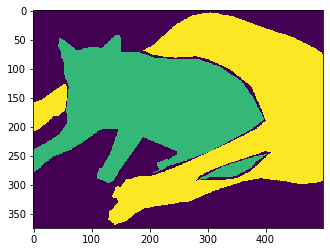

In [16]:
plt.imshow(y)

In [17]:
np.max(y)

12.0

In [18]:
y[300:, 100:]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

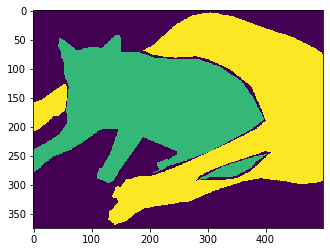

In [19]:
def create_mask( mask):
    #lmask = np.all(mask == self.mask_color[0], axis=-1)
    lmask = []
    indice = 0
    #plt.imshow(mask)
    #plt.show()
    _mask = mask.copy()
    _mask[_mask == np.max(mask)] = 0
    for i, each in enumerate(VOC_COLORMAP):
        tmask = np.all(_mask == each, axis=-1)
        indice += tmask*i
        lmask.append(tmask)
        #print(np.max(tmask))
        #print(each)
        #if np.sum(tmask) > 1:
        #    plt.imshow(tmask)
        #    plt.show()
        #print(tmask)
    #return np.array(lmask)
    return np.array(indice)
y1 = create_mask(nim)
plt.imshow(y1)

In [123]:
np.max(y1)

12

In [23]:
def create_depth_mask( mask):
    #lmask = np.all(mask == self.mask_color[0], axis=-1)
    lmask = []
    indice = 0
    #plt.imshow(mask)
    #plt.show()
    _mask = mask.copy()
    _mask[_mask == np.max(_mask)] = 0
    for i, each in enumerate(VOC_COLORMAP):
        tmask = np.all(_mask == each, axis=-1)
        print(tmask)
        indice += tmask*i
        lmask.append(tmask)
        #print(np.max(tmask))
        #print(each)
        #if np.sum(tmask) > 1:
        #    plt.imshow(tmask)
        #    plt.show()
        #print(tmask)
    return np.array(lmask)
    #return np.array(indice)
y2 = create_depth_mask(nim)
print('')

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False F

In [110]:
import torch

In [129]:
#y2 = torch.from_numpy(y2).astype(torch.FloatTensor)
y2 =  torch.from_numpy(y2).type(torch.FloatTensor)

In [130]:
y2mask = torch.argmax(y2, dim=0)
print(torch.max(y2mask))

tensor(20)


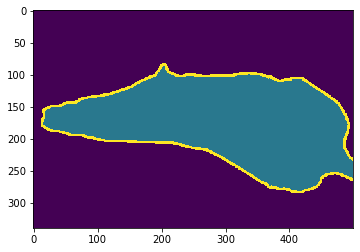

In [113]:
plt.imshow(y2mask.numpy())

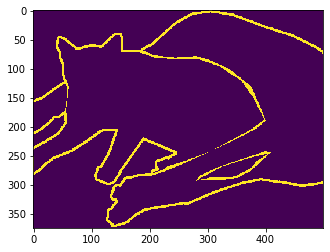

In [131]:
delta = y2mask.numpy() - y1
plt.imshow(delta)

In [4]:
import scipy.misc as sci

In [2]:
train_data = r'E:\ProgrammingSkills\python\DEEP_LEARNING\DATASETS\CamVid\train'
train_annot = r'E:\ProgrammingSkills\python\DEEP_LEARNING\DATASETS\CamVid\trainannot'
getPath = lambda x : [os.path.join(x, each) for each in os.listdir(x)]
train_data = getPath(train_data)
train_annot = getPath(train_annot)

In [57]:
classes = ['Sky', 'Building', 'Column-Pole', 'Road',
           'Sidewalk', 'Tree', 'Sign-Symbol', 'Fence', 'Car', 'Pedestrain',
           'Bicyclist', 'Void']

In [54]:
it = 99
img = sci.imread(train_data[it])
annot = sci.imread(train_annot[it])

C:\Program Files\Python37\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
C:\Program Files\Python37\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


label=> Sky


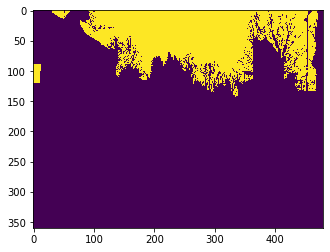

label=> Building


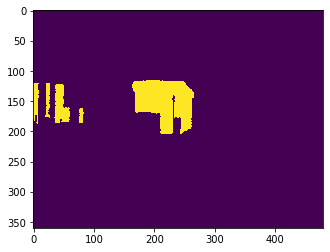

label=> Column-Pole


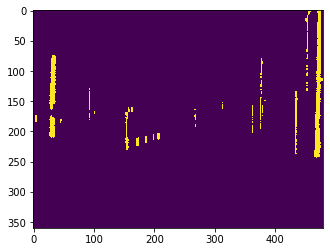

label=> Road


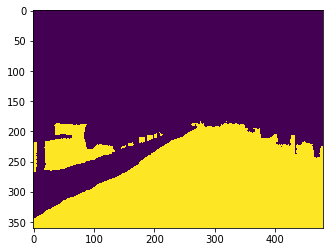

label=> Sidewalk


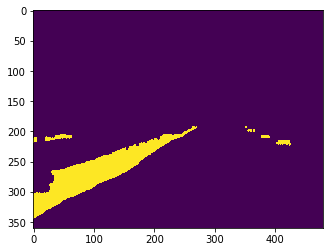

label=> Tree


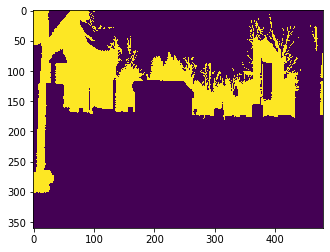

label=> Sign-Symbol


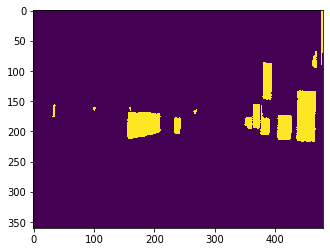

label=> Fence


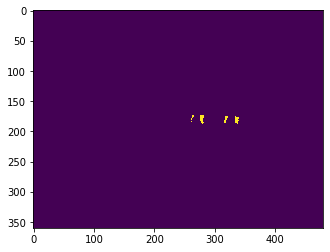

label=> Car


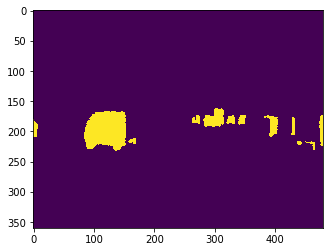

label=> Void


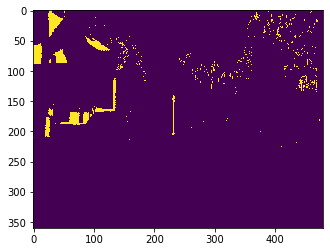

In [58]:
for each in list(np.unique(annot)):
    print(f'label=> {classes[int(each)]}')
    plt.imshow((annot == each).astype('float32'))
    plt.show()

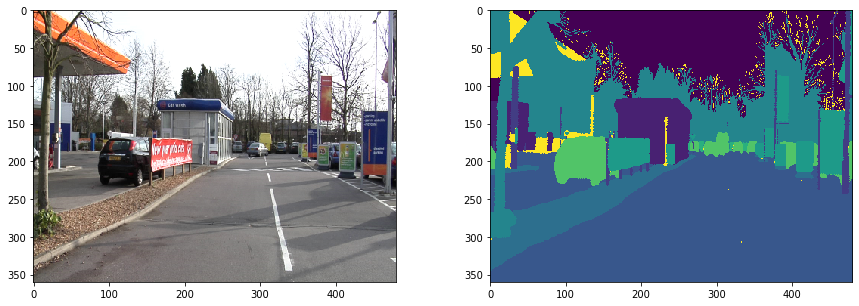

In [56]:
f, axarr = plt.subplots(ncols=2 , figsize=(15, 5))
axarr[0].imshow(img)
axarr[1].imshow(annot)
plt.show()

In [46]:
print((annot == 0).shape)

(360, 480)
